CNN_1DNN

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,Model,Input

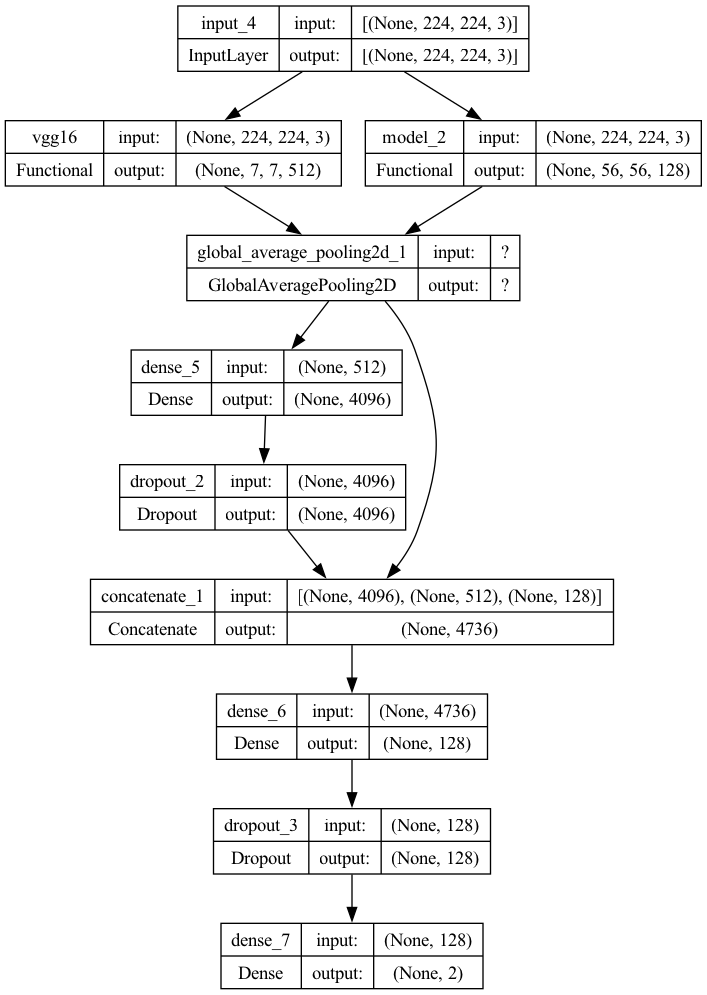

In [4]:


data_aug=tf.keras.Sequential([layers.RandomFlip('horizontal_and_vertical',input_shape=(224,224,3)),
                              layers.RandomRotation(0.2),
                              layers.RandomZoom(0.2)])

preprocess_input=tf.keras.applications.vgg16.preprocess_input


base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),
                                               include_top=False,
                                               weights=None)

base_model.trainable=False
global_avg_layer=layers.GlobalAveragePooling2D()
prediction_layer=layers.Dense(128,activation='linear')






input_image=Input(shape=(224,224,3))
aug_img=data_aug(input_image)
preprocessed_img=preprocess_input(aug_img)

base_model_output=base_model(input_image,training=False)

block2_pool_output = base_model.get_layer('block2_pool').output
model_block2_pool = Model(inputs=base_model.input, outputs=block2_pool_output)
pool_2_output = model_block2_pool(input_image)
pool_2_output_global=global_avg_layer(pool_2_output )

base_model_output_global=global_avg_layer(base_model_output)


# input_lndmark=Input(shape=(136,))

# x=layers.concatenate([base_model_output_global,input_lndmark])

x=layers.Dense(4096,activation='relu')(base_model_output_global)
x=layers.Dropout(0.5)(x)

x=layers.concatenate([x,base_model_output_global,pool_2_output_global])


x=layers.Dense(128,activation='relu')(x)
x=layers.Dropout(0.8)(x)
outputs=layers.Dense(5)(x)

model=tf.keras.Model([input_image],outputs)



tf.keras.utils.plot_model(model,'CNN_1DNN.png',show_shapes=True)

CNN_3DNN

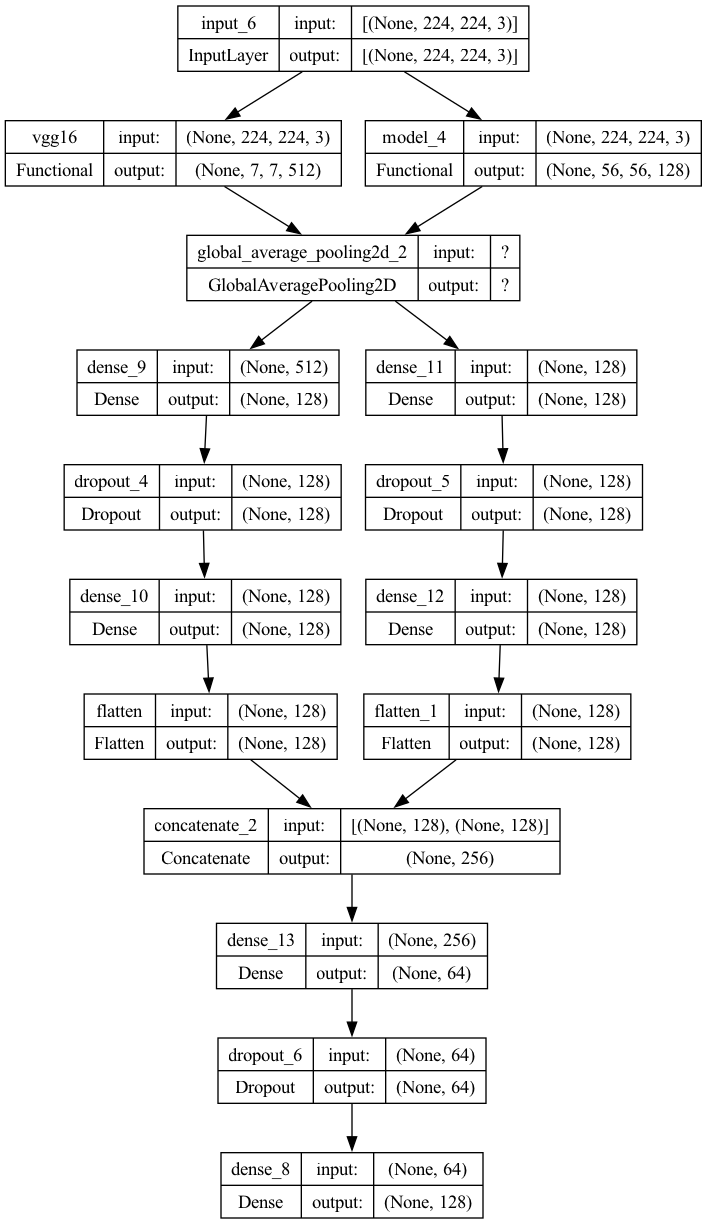

In [5]:


data_aug=tf.keras.Sequential([layers.RandomFlip('horizontal_and_vertical',input_shape=(224,224,3)),
                              layers.RandomRotation(0.2),
                              layers.RandomZoom(0.2)])

preprocess_input=tf.keras.applications.vgg16.preprocess_input


base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),
                                               include_top=False,
                                               weights=None)

base_model.trainable=False
global_avg_layer=layers.GlobalAveragePooling2D()
prediction_layer=layers.Dense(128,activation='linear')






input_image=Input(shape=(224,224,3))
aug_img=data_aug(input_image)
preprocessed_img=preprocess_input(aug_img)

base_model_output=base_model(input_image,training=False)

block2_pool_output = base_model.get_layer('block2_pool').output
model_block2_pool = Model(inputs=base_model.input, outputs=block2_pool_output)
pool_2_output = model_block2_pool(input_image)
pool_2_output_global=global_avg_layer(pool_2_output )

base_model_output_global=global_avg_layer(base_model_output)


# input_lndmark=Input(shape=(136,))

# x=layers.concatenate([base_model_output_global,input_lndmark])

# x=layers.Dense(4096,activation='relu')(x)
# x=layers.Dense(128,activation='relu')(x)
# x=layers.Dropout(0.2)(x)
# x=layers.Dense(128,activation='relu')(x)
# FC1=layers.Flatten()(x)

x=layers.Dense(128,activation='relu')(base_model_output_global)
x=layers.Dropout(0.2)(x)
x=layers.Dense(128,activation='relu')(x)
FC2=layers.Flatten()(x)

x=layers.Dense(128,activation='relu')(pool_2_output_global)
x=layers.Dropout(0.2)(x)
x=layers.Dense(128,activation='relu')(x)
FC3=layers.Flatten()(x)


x=layers.concatenate([FC2,FC3])

x = layers.Dense(64, activation='relu')(x)
x=layers.Dropout(0.2)(x)
outputs=prediction_layer(x)
model=tf.keras.Model([input_image],outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['MSE'])

tf.keras.utils.plot_model(model,'CNN_3DNN.png',show_shapes=True)

## MldrNet

In [1]:
inputs = tf.keras.Input(shape=(244, 244, 3), name="img")
x = layers.Conv2D(128, (11,11),padding='same', activation="relu")(inputs)
x = layers.Conv2D(128, (1,1),padding='same', activation="relu")(x)
block_1_output = layers.MaxPooling2D((3,3))(x)


# x=layers.Conv2D(128,(1,1),padding='same',activation='relu')(block_1_output)
# x=layers.Dense(128,activation='relu')(x)
# branch_1_output=layers.Dense(128,activation='relu')(x)

x = layers.Conv2D(256, (5,5), activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(256, (1,1), activation="relu", padding="same")(x)
block_2_output=layers.MaxPooling2D((3,3))(x)

# x=layers.Conv2D(128,(1,1),padding='same',activation='relu')(block_2_output)
# x=layers.Dense(128,activation='relu')(x)
# branch_2_output=layers.Dense(128,activation='relu')(x)

x = layers.Conv2D(384, (5,5), activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(384, (1,1), activation="relu", padding="same")(x)
block_3_output=layers.MaxPooling2D((3,3))(x)

# x=layers.Conv2D(128,(1,1),padding='same',activation='relu')(block_3_output)
# x=layers.Dense(128,activation='relu')(x)
# branch_3_output=layers.Dense(128,activation='relu')(x)

x = layers.Conv2D(512, (5,5), activation="relu")(block_3_output)
x = layers.Conv2D(512, (1,1), activation="relu")(x)
block_4_output=layers.MaxPooling2D((3,3))(x)

# x=layers.Conv2D(128,(1,1),padding='same',activation='relu')(block_4_output)
# x=layers.Dense(128,activation='relu')(x)
# branch_4_output=layers.Dense(128,activation='relu')(x)

pooled_1= layers.GlobalAveragePooling2D()(block_1_output)
pooled_2= layers.GlobalAveragePooling2D()(block_2_output)
pooled_3= layers.GlobalAveragePooling2D()(block_3_output)
pooled_4= layers.GlobalAveragePooling2D()(block_4_output)


concatenated_layers = layers.Concatenate()([pooled_1,pooled_2,pooled_3,pooled_4])
fusion_layer = layers.Dense(units=128, activation='relu')(concatenated_layers)

# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(256, activation="relu")(x)
# x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10,activation='softmax')(fusion_layer)

model = tf.keras.Model(inputs, outputs, name="mldrnet")

tf.keras.utils.plot_model(model, "mldrnet.png", show_shapes=True)



NameError: name 'tf' is not defined

2024-03-09 00:56:10.104567: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-09 00:56:10.104587: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-09 00:56:10.104593: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-09 00:56:10.105051: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-09 00:56:10.105503: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


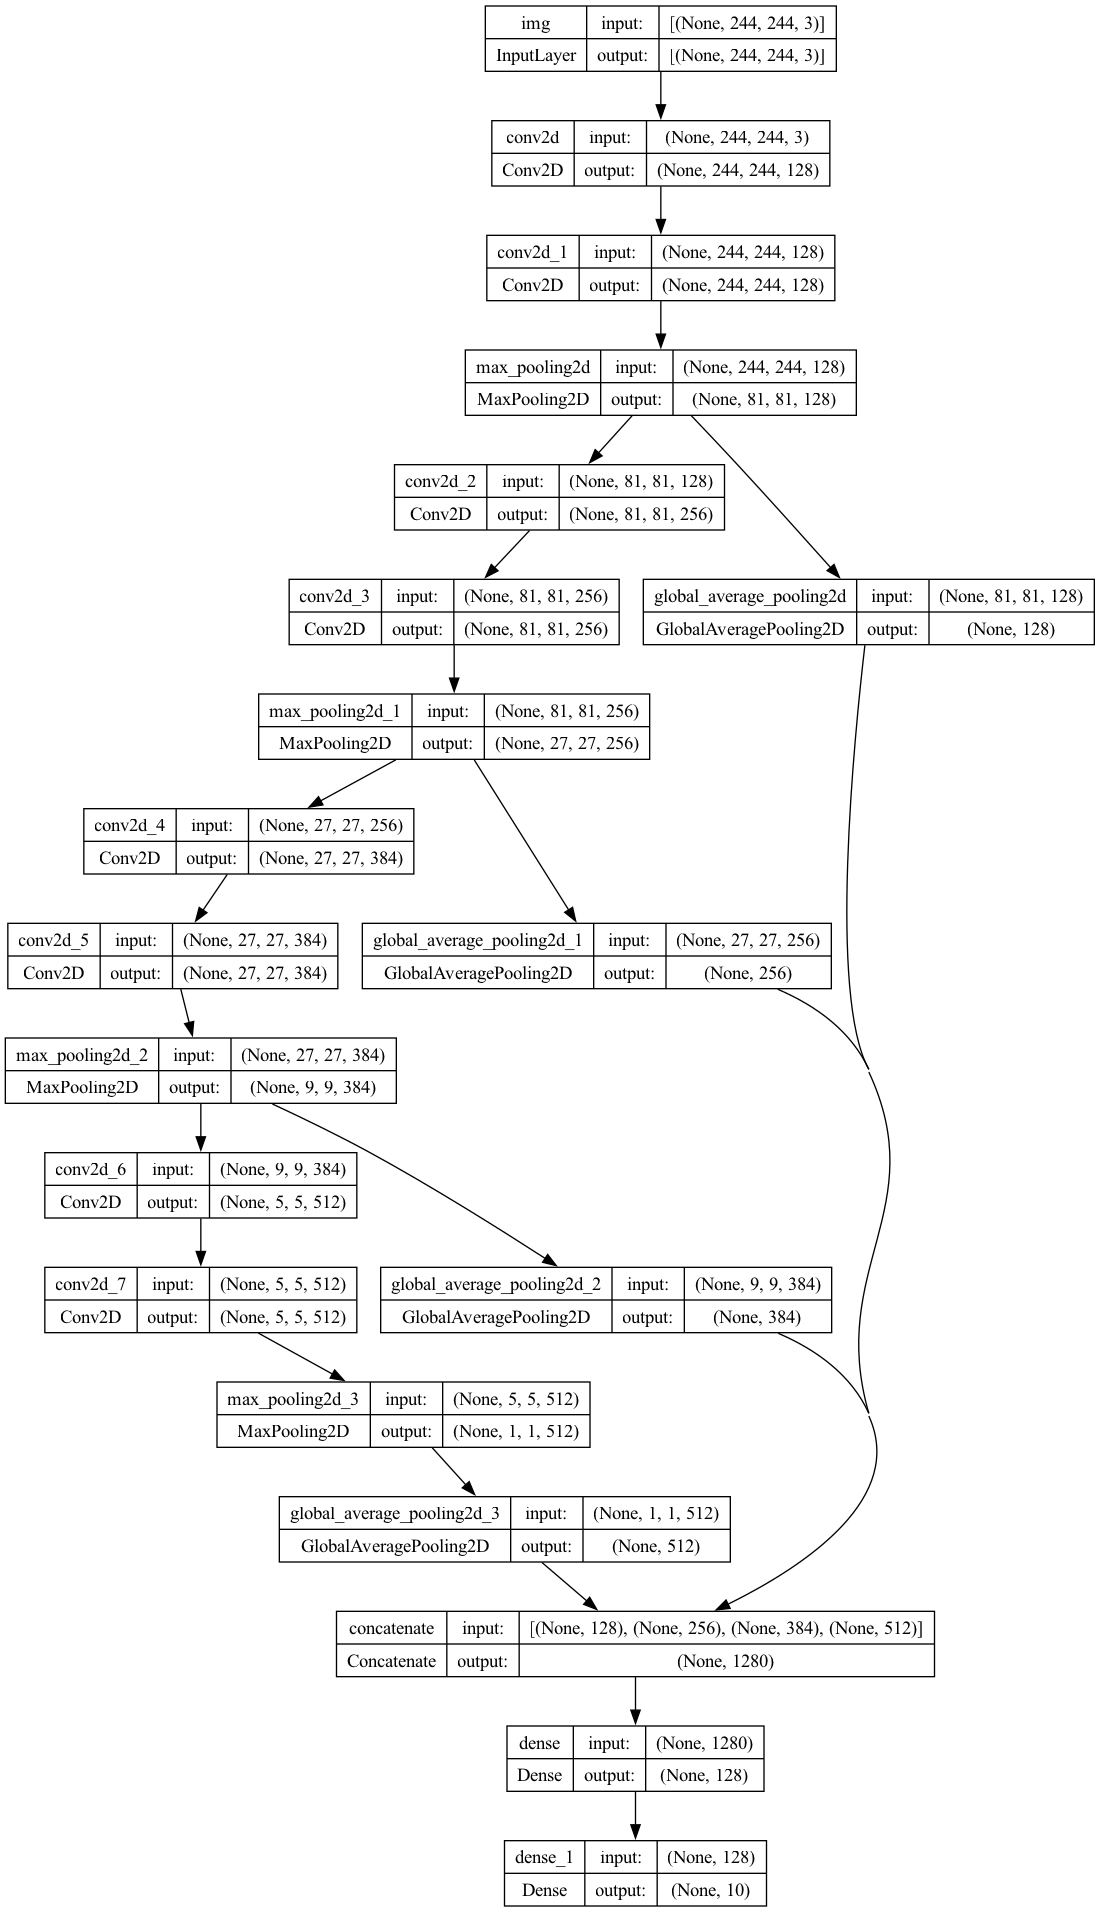

In [2]:
inputs = tf.keras.Input(shape=(244, 244, 3), name="img")
x = layers.Conv2D(128, (11,11),padding='same', activation="relu")(inputs)
x = layers.Conv2D(128, (1,1),padding='same', activation="relu")(x)
block_1_output = layers.MaxPooling2D((3,3))(x)


# x=layers.Conv2D(128,(1,1),padding='same',activation='relu')(block_1_output)
# x=layers.Dense(128,activation='relu')(x)
# branch_1_output=layers.Dense(128,activation='relu')(x)

x = layers.Conv2D(256, (5,5), activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(256, (1,1), activation="relu", padding="same")(x)
block_2_output=layers.MaxPooling2D((3,3))(x)

# x=layers.Conv2D(128,(1,1),padding='same',activation='relu')(block_2_output)
# x=layers.Dense(128,activation='relu')(x)
# branch_2_output=layers.Dense(128,activation='relu')(x)

x = layers.Conv2D(384, (5,5), activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(384, (1,1), activation="relu", padding="same")(x)
block_3_output=layers.MaxPooling2D((3,3))(x)

# x=layers.Conv2D(128,(1,1),padding='same',activation='relu')(block_3_output)
# x=layers.Dense(128,activation='relu')(x)
# branch_3_output=layers.Dense(128,activation='relu')(x)

x = layers.Conv2D(512, (5,5), activation="relu")(block_3_output)
x = layers.Conv2D(512, (1,1), activation="relu")(x)
block_4_output=layers.MaxPooling2D((3,3))(x)

# x=layers.Conv2D(128,(1,1),padding='same',activation='relu')(block_4_output)
# x=layers.Dense(128,activation='relu')(x)
# branch_4_output=layers.Dense(128,activation='relu')(x)

pooled_1= layers.GlobalAveragePooling2D()(block_1_output)
pooled_2= layers.GlobalAveragePooling2D()(block_2_output)
pooled_3= layers.GlobalAveragePooling2D()(block_3_output)
pooled_4= layers.GlobalAveragePooling2D()(block_4_output)


concatenated_layers = layers.Concatenate()([pooled_1,pooled_2,pooled_3,pooled_4])
fusion_layer = layers.Dense(units=128, activation='relu')(concatenated_layers)

# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(256, activation="relu")(x)
# x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10,activation='softmax')(fusion_layer)

model = tf.keras.Model(inputs, outputs, name="mldrnet")

tf.keras.utils.plot_model(model, "mldrnet.png", show_shapes=True)



In [4]:
model.summary()

Model: "mldrnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 244, 244, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 244, 244, 128)        46592     ['img[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 244, 244, 128)        16512     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 81, 81, 128)          0         ['conv2d_1[0][0]']            
 D)                                                                                         